# [Entrega #2] Preprocesamiento de Datos


## Descripci√≥n
En este proyecto, realizamos un preprocesamiento de los datos proporcionados. El objetivo es preparar los datos para el modelado posterior, rellenando valores faltantes, detectando y corrigiendo valores atu00edpicos, normalizando y escalando los datos, codificando variables categu00f3ricas y creando variables adicionales para mejorar el modelado.

## Objetivos
- Identificar y rellenar valores faltantes
- Detectar y corregir valores atipicos (outliers)
- Normalizar y escalar los datos
- Codificar variables categorizar
- Crear variables adicionales para mejorar el modelado

## Metodolog√≠a de Preprocesamiento

### 1. Carga y Exploraci√≥n Inicial de Datos
- Cargamos los conjuntos de datos de entrenamiento y prueba
- Examinamos la estructura general de los datos (dimensiones, tipos de datos)
- Identificamos columnas categ√≥ricas y num√©ricas
- Analizamos la presencia de valores faltantes

### 2. Tratamiento de Valores Faltantes
- Identificamos columnas con valores faltantes
- Para variables num√©ricas: imputamos con la media de la columna
- Para variables categ√≥ricas: imputamos con la moda (valor m√°s frecuente)
- Verificamos que no queden valores faltantes en el conjunto de datos

### 3. Detecci√≥n y Tratamiento de Outliers
- Utilizamos el m√©todo del Rango Intercuartil (IQR)
- Calculamos los l√≠mites inferior y superior (Q1 - 1.5*IQR y Q3 + 1.5*IQR)
- Identificamos valores fuera de estos lu00edmites
- Aplicamos tu00e9cnicas de recorte (capping) para limitar los valores extremos

### 4. Codificaci√≥n de Variables Categoricas
- Identificamos todas las variables categoricas
- Aplicamos codificaci√≥n one-hot (variables dummy)
- Eliminamos una categor√≠a de referencia para evitar multicolinealidad (drop_first=True)
- Aseguramos que el conjunto de prueba tenga las mismas columnas que el de entrenamiento

### 5. Normalizaci√≥n de Variables Num√©ricas
- Aplicamos normalizaci√≥n min-max para escalar todas las variables num√©ricas al rango [0,1]
- Utilizamos los valores m√≠nimo y m√°ximo del conjunto de entrenamiento para normalizar tambi√©n el conjunto de prueba
- Verificamos que todas las variables est√©n correctamente escaladas

## Datos
Los datos contienen informaci√≥n sobre rendimiento acad√©mico clasificado en diferentes categor√≠as (bajo, medio-bajo, medio-alto, alto), junto con diversas variables predictoras que pueden influir en dicho rendimiento.

## Implementaci√≥n
Todo el proceso de preprocesamiento est√° implementado en el notebook **02 - preprocesado.ipynb**, que incluye:

- Funciones modulares para cada paso del preprocesamiento
- Visualizaciones para entender mejor los datos
- Verificaciones en cada etapa para garantizar la calidad de los datos
- Flujo paso a paso para mayor claridad y control del proceso

## Video de Avance del Proyecto
[Enlace al video en YouTube](https://www.youtube.com/watch?v=XXXX) - Este video explica el estado actual del proyecto, las dificultades encontradas y los pr√≥ximos pasos a seguir.


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# 1. Cargar los datos
def cargar_datos(ruta_train):
    """
    Carga el conjunto de datos de entrenamiento desde un archivo CSV.
    
    Args:
        ruta_train (str): Ruta al archivo CSV de entrenamiento
        
    Returns:
        pandas.DataFrame: DataFrame de entrenamiento
    """
    train_df = pd.read_csv(ruta_train)
    
    print(f"Forma de los datos de entrenamiento: {train_df.shape}")
    
    return train_df

train_df = cargar_datos('Data/train.csv')
test_df =  cargar_datos('Data/test.csv')

Forma de los datos de entrenamiento: (692500, 21)
Forma de los datos de entrenamiento: (296786, 20)


In [19]:
display(train_df.head())
display(test_df.head())


ID  PERIODO         ESTU_PRGM_ACADEMICO ESTU_PRGM_DEPARTAMENTO  \
0  904256    20212                  ENFERMERIA                 BOGOT√Å   
1  645256    20212                     DERECHO              ATLANTICO   
2  308367    20203       MERCADEO Y PUBLICIDAD                 BOGOT√Å   
3  470353    20195  ADMINISTRACION DE EMPRESAS              SANTANDER   
4  989032    20212                  PSICOLOGIA              ANTIOQUIA   

             ESTU_VALORMATRICULAUNIVERSIDAD ESTU_HORASSEMANATRABAJA  \
0  Entre 5.5 millones y menos de 7 millones       Menos de 10 horas   
1  Entre 2.5 millones y menos de 4 millones                       0   
2  Entre 2.5 millones y menos de 4 millones         M√°s de 30 horas   
3  Entre 4 millones y menos de 5.5 millones                       0   
4  Entre 2.5 millones y menos de 4 millones     Entre 21 y 30 horas   

  FAMI_ESTRATOVIVIENDA FAMI_TIENEINTERNET                 FAMI_EDUCACIONPADRE  \
0            Estrato 3                 Si    T√©cnica o tecnol√≥gica incompleta   
1            Estrato 3                 No      T√©cnica o tecnol√≥gica completa   
2            Estrato 3                 Si  Secundaria (Bachillerato) completa   
3            Estrato 4                 Si                             No sabe   
4            Estrato 3                 Si                   Primaria completa   

  FAMI_TIENELAVADORA  ... ESTU_PRIVADO_LIBERTAD ESTU_PAGOMATRICULAPROPIO  \
0                 Si  ...                     N                       No   
1                 Si  ...                     N                       No   
2                 Si  ...                     N                       No   
3                 Si  ...                     N                       No   
4                 Si  ...                     N                       No   

  FAMI_TIENECOMPUTADOR FAMI_TIENEINTERNET.1  \
0                   Si                   Si   
1                   Si                   No   
2                   No                   Si   
3                   Si                   Si   
4                   Si                   Si   

                  FAMI_EDUCACIONMADRE RENDIMIENTO_GLOBAL coef_1  coef_2  \
0                           Postgrado         medio-alto  0.322   0.208   
1    T√©cnica o tecnol√≥gica incompleta               bajo  0.311   0.215   
2  Secundaria (Bachillerato) completa               bajo  0.297   0.214   
3  Secundaria (Bachillerato) completa               alto  0.485   0.172   
4                   Primaria completa         medio-bajo  0.316   0.232   

   coef_3  coef_4  
0   0.310   0.267  
1   0.292   0.264  
2   0.305   0.264  
3   0.252   0.190  
4   0.285   0.294  

[5 rows x 21 columns]

ID  PERIODO                     ESTU_PRGM_ACADEMICO  \
0  550236    20183                          TRABAJO SOCIAL   
1   98545    20203  ADMINISTRACION COMERCIAL Y DE MERCADEO   
2  499179    20212                  INGENIERIA MECATRONICA   
3  782980    20195                      CONTADURIA PUBLICA   
4  785185    20212              ADMINISTRACION DE EMPRESAS   

  ESTU_PRGM_DEPARTAMENTO            ESTU_VALORMATRICULAUNIVERSIDAD  \
0                BOLIVAR                          Menos de 500 mil   
1              ANTIOQUIA  Entre 2.5 millones y menos de 4 millones   
2                 BOGOT√Å    Entre 1 mill√≥n y menos de 2.5 millones   
3                  SUCRE    Entre 1 mill√≥n y menos de 2.5 millones   
4              ATLANTICO  Entre 2.5 millones y menos de 4 millones   

  ESTU_HORASSEMANATRABAJA FAMI_ESTRATOVIVIENDA FAMI_TIENEINTERNET  \
0       Menos de 10 horas            Estrato 3                 Si   
1     Entre 21 y 30 horas            Estrato 2                 Si   
2                       0            Estrato 3                 Si   
3     Entre 21 y 30 horas            Estrato 1                 No   
4     Entre 11 y 20 horas            Estrato 2                 Si   

                    FAMI_EDUCACIONPADRE FAMI_TIENELAVADORA  \
0        T√©cnica o tecnol√≥gica completa                 Si   
1    Secundaria (Bachillerato) completa                 Si   
2  Secundaria (Bachillerato) incompleta                 Si   
3                   Primaria incompleta                 Si   
4    Secundaria (Bachillerato) completa                 Si   

  FAMI_TIENEAUTOMOVIL ESTU_PRIVADO_LIBERTAD ESTU_PAGOMATRICULAPROPIO  \
0                  No                     N                       Si   
1                  No                     N                       No   
2                  No                     N                       No   
3                  No                     N                       No   
4                  No                     N                       No   

  FAMI_TIENECOMPUTADOR FAMI_TIENEINTERNET.1  \
0                   Si                   Si   
1                   Si                   Si   
2                   Si                   Si   
3                   No                   No   
4                   Si                   Si   

                  FAMI_EDUCACIONMADRE  coef_1  coef_2  coef_3  coef_4  
0                   Primaria completa   0.328   0.219   0.317   0.247  
1      T√©cnica o tecnol√≥gica completa   0.227   0.283   0.296   0.324  
2  Secundaria (Bachillerato) completa   0.285   0.228   0.294   0.247  
3                 Primaria incompleta   0.160   0.408   0.217   0.294  
4  Secundaria (Bachillerato) completa   0.209   0.283   0.306   0.286

In [37]:
import pandas as pd
import numpy as np

def imputar_datos_faltantes(df):
    """
    Imputa valores faltantes en un DataFrame de forma eficiente:
    - Si una fila tiene 2 o menos NaNs, imputa con media (num√©rico) o moda (categ√≥rico).
    - Si una fila tiene m√°s de 2 NaNs, elimina esa fila.
    Adem√°s, reemplaza strings vac√≠os en columnas categ√≥ricas por la moda.
    """
    df_limpio = df.copy()

    # 1. Eliminar filas con m√°s de 2 NaNs
    mask_filas_validas = df_limpio.isnull().sum(axis=1) <= 2
    n_filas_eliminadas = (~mask_filas_validas).sum()
    df_limpio = df_limpio[mask_filas_validas].copy()

    # 2. Calcular medias y modas solo una vez
    medias = df_limpio.select_dtypes(include=np.number).mean()
    modas = df_limpio.select_dtypes(exclude=np.number).mode().iloc[0]

    # 3. Imputar por columna (m√°s eficiente que iterar por fila)
    for col in df_limpio.columns:
        if df_limpio[col].isnull().sum() == 0 and not (df_limpio[col].dtype == 'object' and (df_limpio[col] == '').any()):
            continue
        if pd.api.types.is_numeric_dtype(df_limpio[col]):
            df_limpio[col] = df_limpio[col].fillna(medias[col])
        else:
            valor = modas[col] if col in modas else 'Desconocido'
            # Imputa NaN y tambi√©n reemplaza strings vac√≠os
            df_limpio[col] = df_limpio[col].replace('', np.nan)
            df_limpio[col] = df_limpio[col].fillna(valor)

    print("=== Imputaci√≥n de Valores Faltantes ===")
    print(f"Filas eliminadas por tener m√°s de 2 NaNs: {n_filas_eliminadas}")
    print(f"Total de filas despu√©s de limpieza: {df_limpio.shape[0]}\n")

    total_nans_despues = df_limpio.isnull().sum().sum()
    if total_nans_despues == 0:
        print("‚úÖ No quedan valores faltantes en el DataFrame.")
    else:
        print(f"‚ö†Ô∏è A√∫n quedan {total_nans_despues} valores faltantes. Revisa las columnas con NaNs.")
        display(df_limpio.isnull().sum()[df_limpio.isnull().sum() > 0])

    return df_limpio

# Uso:
train_df_imputado = imputar_datos_faltantes(train_df)
display(train_df_imputado)

test_df_imputado = imputar_datos_faltantes(test_df)
display(test_df_imputado)

=== Imputaci√≥n de Valores Faltantes ===
Filas eliminadas por tener m√°s de 2 NaNs: 36713
Total de filas despu√©s de limpieza: 655787

‚úÖ No quedan valores faltantes en el DataFrame.


ID  PERIODO                  ESTU_PRGM_ACADEMICO  \
0       904256    20212                           ENFERMERIA   
1       645256    20212                              DERECHO   
2       308367    20203                MERCADEO Y PUBLICIDAD   
3       470353    20195           ADMINISTRACION DE EMPRESAS   
4       989032    20212                           PSICOLOGIA   
...        ...      ...                                  ...   
692495   25096    20195                             BIOLOGIA   
692496  754213    20212                           PSICOLOGIA   
692497  504185    20183  ADMINISTRACI√ìN EN SALUD OCUPACIONAL   
692498  986620    20195                           PSICOLOGIA   
692499  933374    20195                           PSICOLOGIA   

       ESTU_PRGM_DEPARTAMENTO            ESTU_VALORMATRICULAUNIVERSIDAD  \
0                      BOGOT√Å  Entre 5.5 millones y menos de 7 millones   
1                   ATLANTICO  Entre 2.5 millones y menos de 4 millones   
2                      BOGOT√Å  Entre 2.5 millones y menos de 4 millones   
3                   SANTANDER  Entre 4 millones y menos de 5.5 millones   
4                   ANTIOQUIA  Entre 2.5 millones y menos de 4 millones   
...                       ...                                       ...   
692495             LA GUAJIRA         Entre 500 mil y menos de 1 mill√≥n   
692496        NORTE SANTANDER  Entre 2.5 millones y menos de 4 millones   
692497                 BOGOT√Å    Entre 1 mill√≥n y menos de 2.5 millones   
692498                 TOLIMA  Entre 2.5 millones y menos de 4 millones   
692499              ANTIOQUIA  Entre 5.5 millones y menos de 7 millones   

       ESTU_HORASSEMANATRABAJA FAMI_ESTRATOVIVIENDA FAMI_TIENEINTERNET  \
0            Menos de 10 horas            Estrato 3                 Si   
1                            0            Estrato 3                 No   
2              M√°s de 30 horas            Estrato 3                 Si   
3                            0            Estrato 4                 Si   
4          Entre 21 y 30 horas            Estrato 3                 Si   
...                        ...                  ...                ...   
692495     Entre 11 y 20 horas            Estrato 2                 Si   
692496         M√°s de 30 horas            Estrato 3                 Si   
692497       Menos de 10 horas            Estrato 3                 Si   
692498       Menos de 10 horas            Estrato 1                 No   
692499         M√°s de 30 horas            Estrato 4                 Si   

                       FAMI_EDUCACIONPADRE FAMI_TIENELAVADORA  ...  \
0         T√©cnica o tecnol√≥gica incompleta                 Si  ...   
1           T√©cnica o tecnol√≥gica completa                 Si  ...   
2       Secundaria (Bachillerato) completa                 Si  ...   
3                                  No sabe                 Si  ...   
4                        Primaria completa                 Si  ...   
...                                    ...                ...  ...   
692495  Secundaria (Bachillerato) completa                 Si  ...   
692496                 Primaria incompleta                 Si  ...   
692497  Secundaria (Bachillerato) completa                 Si  ...   
692498                   Primaria completa                 No  ...   
692499  Secundaria (Bachillerato) completa                 Si  ...   

       ESTU_PRIVADO_LIBERTAD ESTU_PAGOMATRICULAPROPIO FAMI_TIENECOMPUTADOR  \
0                          N                       No                   Si   
1                          N                       No                   Si   
2                          N                       No                   No   
3                          N                       No                   Si   
4                          N                       No                   Si   
...                      ...                      ...                  ...   
692495                     N                       Si

=== Imputaci√≥n de Valores Faltantes ===
Filas eliminadas por tener m√°s de 2 NaNs: 15837
Total de filas despu√©s de limpieza: 280949

‚úÖ No quedan valores faltantes en el DataFrame.


ID  PERIODO                     ESTU_PRGM_ACADEMICO  \
0       550236    20183                          TRABAJO SOCIAL   
1        98545    20203  ADMINISTRACION COMERCIAL Y DE MERCADEO   
2       499179    20212                  INGENIERIA MECATRONICA   
3       782980    20195                      CONTADURIA PUBLICA   
4       785185    20212              ADMINISTRACION DE EMPRESAS   
...        ...      ...                                     ...   
296781  496981    20195              ADMINISTRACION DE EMPRESAS   
296782  209415    20183                                 DERECHO   
296783  239074    20212                                 DERECHO   
296784  963852    20195                  INGENIERIA AERONAUTICA   
296785  792650    20212                   INGENIERIA INDUSTRIAL   

       ESTU_PRGM_DEPARTAMENTO            ESTU_VALORMATRICULAUNIVERSIDAD  \
0                     BOLIVAR                          Menos de 500 mil   
1                   ANTIOQUIA  Entre 2.5 millones y menos de 4 millones   
2                      BOGOT√Å    Entre 1 mill√≥n y menos de 2.5 millones   
3                       SUCRE    Entre 1 mill√≥n y menos de 2.5 millones   
4                   ATLANTICO  Entre 2.5 millones y menos de 4 millones   
...                       ...                                       ...   
296781                 BOGOT√Å  Entre 2.5 millones y menos de 4 millones   
296782                   META    Entre 1 mill√≥n y menos de 2.5 millones   
296783                 BOGOT√Å  Entre 2.5 millones y menos de 4 millones   
296784              ANTIOQUIA  Entre 5.5 millones y menos de 7 millones   
296785                 BOYACA                         No pag√≥ matr√≠cula   

       ESTU_HORASSEMANATRABAJA FAMI_ESTRATOVIVIENDA FAMI_TIENEINTERNET  \
0            Menos de 10 horas            Estrato 3                 Si   
1          Entre 21 y 30 horas            Estrato 2                 Si   
2                            0            Estrato 3                 Si   
3          Entre 21 y 30 horas            Estrato 1                 No   
4          Entre 11 y 20 horas            Estrato 2                 Si   
...                        ...                  ...                ...   
296781         M√°s de 30 horas            Estrato 1                 Si   
296782                       0            Estrato 4                 Si   
296783         M√°s de 30 horas            Estrato 3                 Si   
296784     Entre 11 y 20 horas            Estrato 3                 Si   
296785                       0            Estrato 3                 Si   

                         FAMI_EDUCACIONPADRE FAMI_TIENELAVADORA  \
0             T√©cnica o tecnol√≥gica completa                 Si   
1         Secundaria (Bachillerato) completa                 Si   
2       Secundaria (Bachillerato) incompleta                 Si   
3                        Primaria incompleta                 Si   
4         Secundaria (Bachillerato) completa                 Si   
...                                      ...                ...   
296781                   Primaria incompleta                 Si   
296782        Educaci√≥n profesional completa                 Si   
296783    Secundaria (Bachillerato) completa                 Si   
296784        Educaci√≥n profesional completa                 Si   
296785    Secundaria (Bachillerato) completa                 Si   

       FAMI_TIENEAUTOMOVIL ESTU_PRIVADO_LIBERTAD ESTU_PAGOMATRICULAPROPIO  \
0                       No                     N                       Si   
1                       No                     N                       No   
2                       No                     N                       No   
3                       No                     N                       No   
4                       No                     N                       No   
...                    ...                   ...                      ...   
296781                  Si                     N           

In [39]:
import pandas as pd
import numpy as np

def eliminar_outliers_iqr(df):
    """
    Elimina filas de un DataFrame que contienen outliers en columnas num√©ricas, 
    basado en el m√©todo del Rango Intercuart√≠lico (IQR).

    Args:
        df (pd.DataFrame): DataFrame de entrada.

    Returns:
        pd.DataFrame: DataFrame sin las filas que conten√≠an outliers.
    """
    df_limpio = df.copy()
    resumen = []

    print("=== Eliminaci√≥n de Outliers usando IQR ===")
    print(f"Tama√±o original del DataFrame: {df.shape[0]} filas\n")

    numerical_cols = df.select_dtypes(include=np.number).columns

    if numerical_cols.empty:
        print("No se encontraron columnas num√©ricas. No se eliminaron outliers.")
        return df_limpio

    mascara_sin_outliers = pd.Series([True] * len(df_limpio), index=df_limpio.index)

    for col in numerical_cols:
        Q1 = df_limpio[col].quantile(0.25)
        Q3 = df_limpio[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers_columna = (df_limpio[col] < lower_bound) | (df_limpio[col] > upper_bound)
        num_outliers_col = outliers_columna.sum()

        resumen.append({
            "Columna": col,
            "Q1": round(Q1, 2),
            "Q3": round(Q3, 2),
            "IQR": round(IQR, 2),
            "L√≠mite Inferior": round(lower_bound, 2),
            "L√≠mite Superior": round(upper_bound, 2),
            "Outliers Detectados": int(num_outliers_col)
        })

        if num_outliers_col > 0:
            mascara_sin_outliers = mascara_sin_outliers & (~outliers_columna)

    df_filtrado = df_limpio[mascara_sin_outliers]
    filas_eliminadas = len(df_limpio) - len(df_filtrado)

    # Mostrar resumen tabular
    resumen_df = pd.DataFrame(resumen)
    print("Resumen de outliers detectados por columna:")
    display(resumen_df.style.format({"Q1": "{:.2f}", "Q3": "{:.2f}", "IQR": "{:.2f}", "L√≠mite Inferior": "{:.2f}", "L√≠mite Superior": "{:.2f}"}))

    print(f"\nTotal de filas eliminadas por contener outliers: {filas_eliminadas}")
    print(f"Tama√±o final del DataFrame: {df_filtrado.shape[0]} filas")
    print("=== Eliminaci√≥n de outliers completada ===\n")

    return df_filtrado

# Uso:
train_df_sin_outliers = eliminar_outliers_iqr(train_df_imputado)
test_df_sin_outliers = eliminar_outliers_iqr(test_df_imputado)

=== Eliminaci√≥n de Outliers usando IQR ===
Tama√±o original del DataFrame: 655787 filas

Resumen de outliers detectados por columna:



Total de filas eliminadas por contener outliers: 76963
Tama√±o final del DataFrame: 578824 filas
=== Eliminaci√≥n de outliers completada ===

=== Eliminaci√≥n de Outliers usando IQR ===
Tama√±o original del DataFrame: 280949 filas

Resumen de outliers detectados por columna:



Total de filas eliminadas por contener outliers: 30120
Tama√±o final del DataFrame: 250829 filas
=== Eliminaci√≥n de outliers completada ===



/tmp/ipykernel_190052/283330291.py:27: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(datos_boxplot, labels=['Original', 'Limpio'], patch_artist=True,
/tmp/ipykernel_190052/283330291.py:27: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(datos_boxplot, labels=['Original', 'Limpio'], patch_artist=True,
/tmp/ipykernel_190052/283330291.py:27: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(datos_boxplot, labels=['Original', 'Limpio'], patch_artist=True,
/tmp/ipykernel_190052/283330291.py:27: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since 

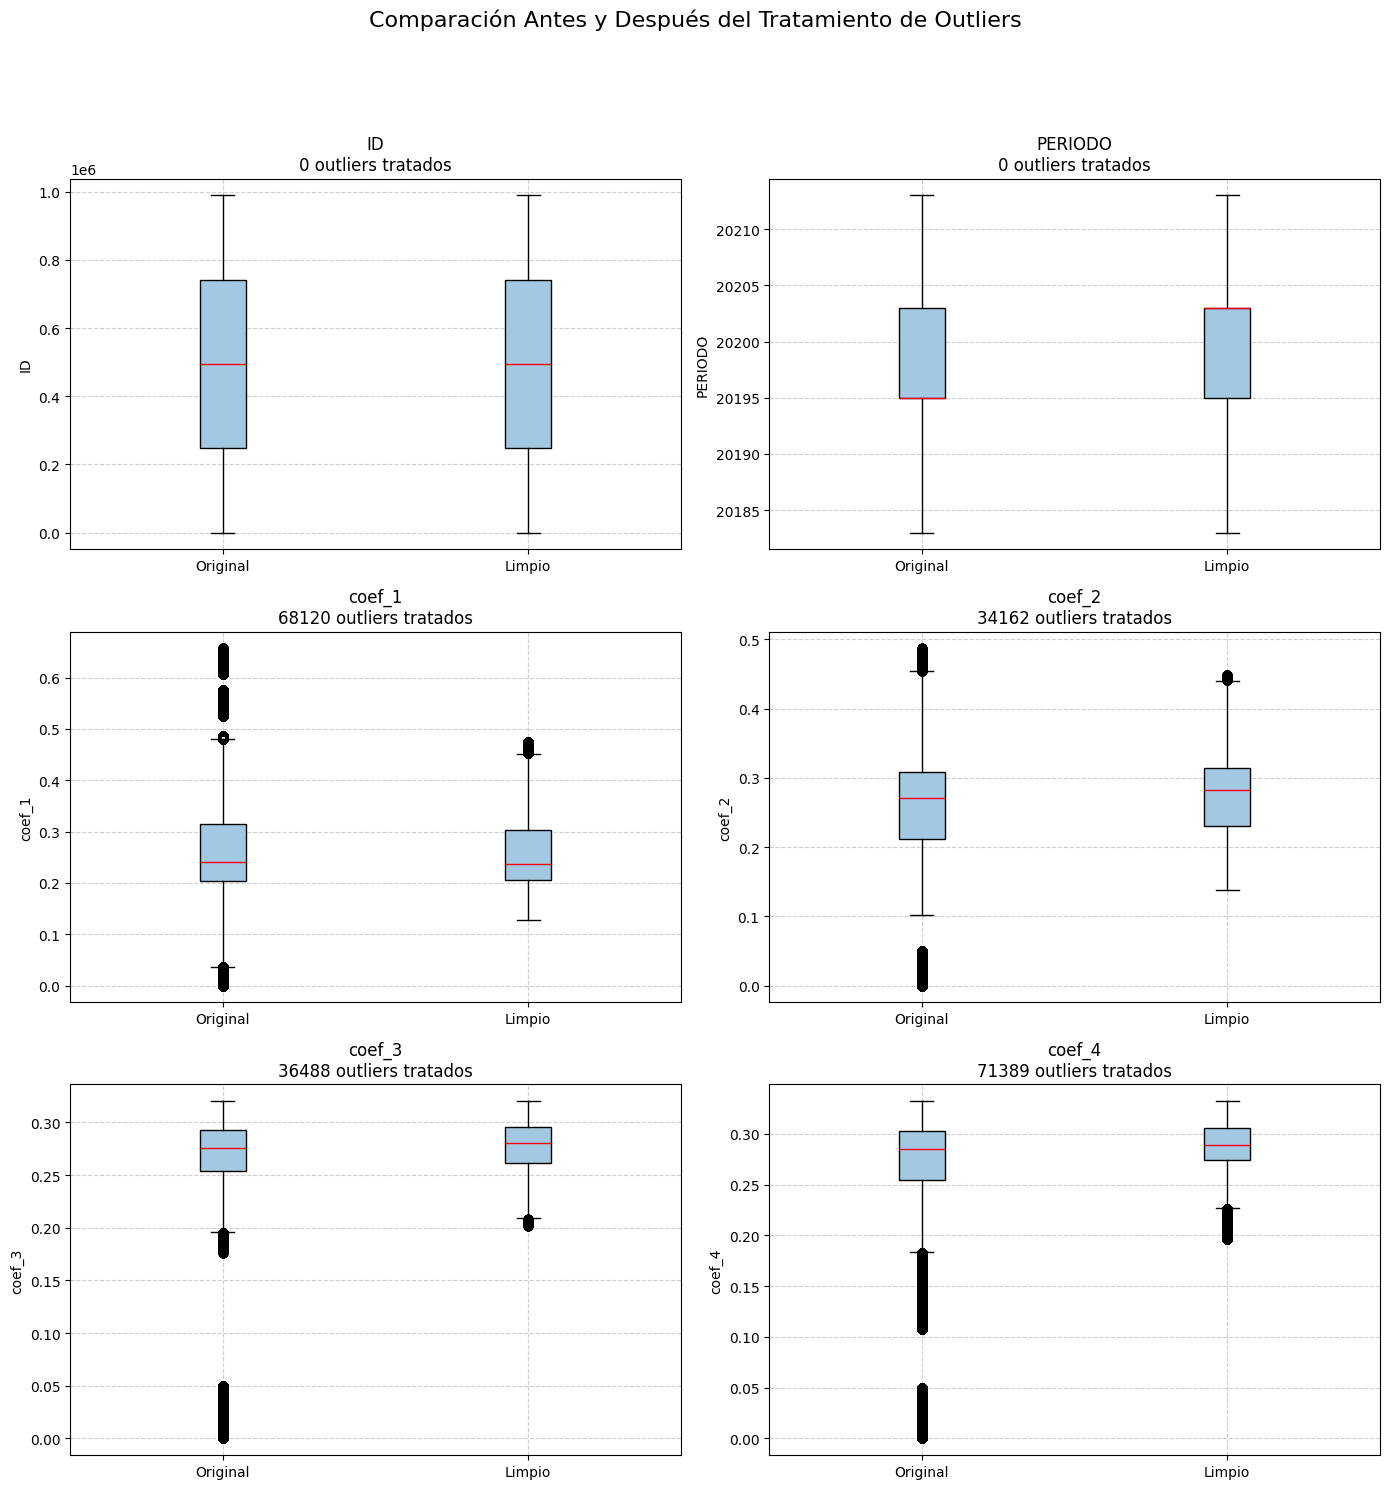


Resumen estad√≠stico de columnas num√©ricas antes y despu√©s del tratamiento de outliers:


Columna  Outliers Outliers (%)  Min Original  Max Original  Min Limpio  \
0       ID         0        0.00%           1.0    989286.000       1.000   
1  PERIODO         0        0.00%       20183.0     20213.000   20183.000   
2   coef_1     68120        9.84%           0.0         0.657       0.128   
3   coef_2     34162        4.93%           0.0         0.487       0.138   
4   coef_3     36488        5.27%           0.0         0.320       0.202   
5   coef_4     71389       10.31%           0.0         0.332       0.196   

   Max Limpio  L√≠mite Inf.  L√≠mite Sup.  
0  989286.000   -494361.88   1483469.12  
1   20213.000     20183.00     20215.00  
2       0.475         0.04         0.48  
3       0.449         0.07         0.45  
4       0.320         0.20         0.35  
5       0.332         0.18         0.38

In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def comparar_tratamiento_outliers(train_df, train_df_limpio, max_cols_por_fila=2):
    """
    Muestra una comparaci√≥n visual y estad√≠stica de los datos antes y despu√©s del tratamiento de valores at√≠picos.
    Los boxplots se organizan de forma m√°s clara y la tabla de resumen es m√°s legible.
    """
    columnas_numericas = train_df.select_dtypes(include=['int64', 'float64']).columns
    n_cols = min(max_cols_por_fila, len(columnas_numericas))
    n_filas = int(np.ceil(len(columnas_numericas) / n_cols))

    fig, axes = plt.subplots(n_filas, n_cols, figsize=(7 * n_cols, 5 * n_filas))
    axes = np.array(axes).reshape(-1)  # Asegura que axes siempre sea 1D

    for i, col in enumerate(columnas_numericas):
        ax = axes[i]
        Q1 = train_df[col].quantile(0.25)
        Q3 = train_df[col].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        cantidad_outliers = ((train_df[col] < limite_inferior) | (train_df[col] > limite_superior)).sum()

        datos_boxplot = [train_df[col], train_df_limpio[col]]
        ax.boxplot(datos_boxplot, labels=['Original', 'Limpio'], patch_artist=True,
                   boxprops=dict(facecolor='#a3c9e2'), medianprops=dict(color='red'))
        ax.set_title(f"{col}\n{cantidad_outliers} outliers tratados", fontsize=12)
        ax.set_ylabel(col)
        ax.grid(True, linestyle='--', alpha=0.6)
        stats_original = f"Min: {train_df[col].min():.2f}, Max: {train_df[col].max():.2f}"
        stats_limpio = f"Min: {train_df_limpio[col].min():.2f}, Max: {train_df_limpio[col].max():.2f}"
        ax.annotate(stats_original, xy=(0, 0), xytext=(0.5, -0.18), textcoords='axes fraction',
                    ha='center', fontsize=9)
        ax.annotate(stats_limpio, xy=(0, 0), xytext=(0.5, -0.28), textcoords='axes fraction',
                    ha='center', fontsize=9)

    # Oculta subgr√°ficos no usados
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.suptitle('Comparaci√≥n Antes y Despu√©s del Tratamiento de Outliers', fontsize=16, y=1.02)
    plt.tight_layout(rect=[0, 0.03, 1, 0.97])
    plt.show()

    # Tabla de resumen estad√≠stico
    resumen = []
    for col in columnas_numericas:
        Q1 = train_df[col].quantile(0.25)
        Q3 = train_df[col].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        cantidad_outliers = ((train_df[col] < limite_inferior) | (train_df[col] > limite_superior)).sum()
        porcentaje_outliers = (cantidad_outliers / len(train_df)) * 100
        resumen.append({
            'Columna': col,
            'Outliers': cantidad_outliers,
            'Outliers (%)': f"{porcentaje_outliers:.2f}%",
            'Min Original': train_df[col].min(),
            'Max Original': train_df[col].max(),
            'Min Limpio': train_df_limpio[col].min(),
            'Max Limpio': train_df_limpio[col].max(),
            'L√≠mite Inf.': round(limite_inferior, 2),
            'L√≠mite Sup.': round(limite_superior, 2)
        })
    df_resumen = pd.DataFrame(resumen)
    print("\nResumen estad√≠stico de columnas num√©ricas antes y despu√©s del tratamiento de outliers:")
    display(df_resumen)

# Uso:
comparar_tratamiento_outliers(train_df, train_df_sin_outliers)

In [41]:
import unicodedata
import pandas as pd
import numpy as np
import time

def eliminar_acentos(
    df, 
    columnas_especificas=None, 
    incluir_nombres_columnas=True, 
    reemplazar_enie=True, 
    conservar_mayusculas=True, 
    mostrar_progreso=True
):
    """
    Elimina acentos (tildes) y caracteres especiales de un DataFrame.
    Devuelve un DataFrame limpio y un resumen estructurado del proceso.
    """
    tiempo_inicio = time.time()
    df_limpio = df.copy()
    estadisticas = {
        'filas_procesadas': len(df),
        'columnas_procesadas': 0,
        'valores_modificados': 0,
        'nombres_columnas_modificados': 0
    }

    def quitar_acentos(texto):
        if not isinstance(texto, str):
            return texto
        try:
            texto_norm = unicodedata.normalize('NFD', texto)
            texto_sin_acentos = ''.join(c for c in texto_norm if not unicodedata.combining(c))
            if reemplazar_enie:
                texto_sin_acentos = texto_sin_acentos.replace('√±', 'n').replace('√ë', 'N')
            resultado = unicodedata.normalize('NFC', texto_sin_acentos)
            return resultado
        except Exception as e:
            print(f"Error al procesar texto '{texto}': {e}")
            return texto

    # Selecci√≥n de columnas a procesar
    if columnas_especificas is not None:
        columnas_validas = [col for col in columnas_especificas if col in df_limpio.columns]
        if len(columnas_validas) < len(columnas_especificas):
            columnas_faltantes = set(columnas_especificas) - set(columnas_validas)
            print(f"‚ö†Ô∏è Advertencia: Las siguientes columnas no existen en el DataFrame: {columnas_faltantes}")
        columnas_a_procesar = columnas_validas
    else:
        columnas_a_procesar = df_limpio.select_dtypes(include='object').columns.tolist()

    # Eliminar acentos de los nombres de columnas
    if incluir_nombres_columnas:
        nombres_originales = list(df_limpio.columns)
        nombres_nuevos = [quitar_acentos(col) for col in nombres_originales]
        nombres_cambiados = sum(1 for orig, nuevo in zip(nombres_originales, nombres_nuevos) if orig != nuevo)
        estadisticas['nombres_columnas_modificados'] = nombres_cambiados
        if nombres_cambiados > 0 and mostrar_progreso:
            print(f"üìù Se modificaron {nombres_cambiados} nombres de columnas para eliminar acentos.")
        df_limpio.columns = nombres_nuevos

    # Procesar columnas de texto
    total_valores_modificados = 0
    if mostrar_progreso and len(columnas_a_procesar) > 0:
        print(f"Procesando {len(columnas_a_procesar)} columnas de texto...")

    for col in columnas_a_procesar:
        valores_originales = df_limpio[col].copy()
        df_limpio[col] = df_limpio[col].apply(quitar_acentos)
        valores_cambiados = (valores_originales != df_limpio[col]).sum()
        total_valores_modificados += valores_cambiados
        if mostrar_progreso and valores_cambiados > 0:
            porcentaje = (valores_cambiados / len(df)) * 100
            print(f"  ‚Ä¢ Columna '{col}': {valores_cambiados} valores modificados ({porcentaje:.2f}%)")

    estadisticas['columnas_procesadas'] = len(columnas_a_procesar)
    estadisticas['valores_modificados'] = total_valores_modificados

    # Resumen final estructurado
    tiempo_total = time.time() - tiempo_inicio
    if mostrar_progreso:
        print("\n=== Resumen del proceso de eliminaci√≥n de acentos ===")
        print(f"Tiempo de procesamiento: {tiempo_total:.2f} segundos")
        print(f"Filas procesadas: {estadisticas['filas_procesadas']}")
        print(f"Columnas de texto procesadas: {estadisticas['columnas_procesadas']}")
        print(f"Valores de texto modificados: {estadisticas['valores_modificados']}")
        print(f"Nombres de columnas modificados: {estadisticas['nombres_columnas_modificados']}")
        print("===============================================")

    return df_limpio, estadisticas

# Ejemplo de uso
train_df_sin_acentos, stats = eliminar_acentos(train_df_sin_outliers, incluir_nombres_columnas=False)
test_df_sin_acentos, stats_test = eliminar_acentos(test_df_sin_outliers, incluir_nombres_columnas=False)

# Mostrar ejemplo de cambios realizados
col_ejemplo = None
for col in ['ESTU_PRGM_DEPARTAMENTO', 'ESTU_PRGM_DEPARTAMENTO', 'DEPARTAMENTO']:
    if col in train_df.columns and col in train_df_sin_acentos.columns:
        col_ejemplo = col
        break

if col_ejemplo:
    comparacion = pd.DataFrame({
        'Original': train_df[col_ejemplo].head(10),
        'Sin Acentos': train_df_sin_acentos[col_ejemplo].head(10)
    })
    print(f"\nEjemplo de eliminaci√≥n de acentos en la columna '{col_ejemplo}':")
    display(comparacion)

# Mostrar columnas cuyos nombres cambiaron
columnas_cambiadas = [(col_orig, col_nuevo) for col_orig, col_nuevo in 
                      zip(train_df.columns, train_df_sin_acentos.columns) 
                      if col_orig != col_nuevo]
if columnas_cambiadas:
    print("\nColumnas cuyos nombres cambiaron despu√©s de eliminar acentos:")
    for viejo, nuevo in columnas_cambiadas:
        print(f"  {viejo} ‚Üí {nuevo}")

# Mostrar DataFrame limpio si se desea
display(train_df_sin_acentos)
display(test_df_sin_acentos)


Procesando 15 columnas de texto...
  ‚Ä¢ Columna 'ESTU_PRGM_ACADEMICO': 113973 valores modificados (19.69%)
  ‚Ä¢ Columna 'ESTU_PRGM_DEPARTAMENTO': 249993 valores modificados (43.19%)
  ‚Ä¢ Columna 'ESTU_VALORMATRICULAUNIVERSIDAD': 311228 valores modificados (53.77%)
  ‚Ä¢ Columna 'ESTU_HORASSEMANATRABAJA': 225960 valores modificados (39.04%)
  ‚Ä¢ Columna 'FAMI_EDUCACIONPADRE': 158041 valores modificados (27.30%)
  ‚Ä¢ Columna 'FAMI_EDUCACIONMADRE': 182541 valores modificados (31.54%)

=== Resumen del proceso de eliminaci√≥n de acentos ===
Tiempo de procesamiento: 7.39 segundos
Filas procesadas: 578824
Columnas de texto procesadas: 15
Valores de texto modificados: 1241736
Nombres de columnas modificados: 0
Procesando 14 columnas de texto...
  ‚Ä¢ Columna 'ESTU_PRGM_ACADEMICO': 48995 valores modificados (19.53%)
  ‚Ä¢ Columna 'ESTU_PRGM_DEPARTAMENTO': 108179 valores modificados (43.13%)
  ‚Ä¢ Columna 'ESTU_VALORMATRICULAUNIVERSIDAD': 134051 valores modificados (53.44%)
  ‚Ä¢ Columna 'E

Original Sin Acentos
0      BOGOT√Å      BOGOTA
1   ATLANTICO   ATLANTICO
2      BOGOT√Å      BOGOTA
3   SANTANDER         NaN
4   ANTIOQUIA   ANTIOQUIA
5   ANTIOQUIA         NaN
6       HUILA       HUILA
7      BOGOT√Å      BOGOTA
8   ATLANTICO   ATLANTICO
9   ANTIOQUIA         NaN
10        NaN       SUCRE
11        NaN      BOGOTA
12        NaN      BOGOTA

ID  PERIODO                                ESTU_PRGM_ACADEMICO  \
0       904256    20212                                         ENFERMERIA   
1       645256    20212                                            DERECHO   
2       308367    20203                              MERCADEO Y PUBLICIDAD   
4       989032    20212                                         PSICOLOGIA   
6        47159    20183                                INGENIERIA MECANICA   
...        ...      ...                                                ...   
692494  649690    20212  LICENCIATURA EN EDUCACION BASICA CON ENFASIS E...   
692495   25096    20195                                           BIOLOGIA   
692496  754213    20212                                         PSICOLOGIA   
692497  504185    20183                ADMINISTRACION EN SALUD OCUPACIONAL   
692498  986620    20195                                         PSICOLOGIA   

       ESTU_PRGM_DEPARTAMENTO            ESTU_VALORMATRICULAUNIVERSIDAD  \
0                      BOGOTA  Entre 5.5 millones y menos de 7 millones   
1                   ATLANTICO  Entre 2.5 millones y menos de 4 millones   
2                      BOGOTA  Entre 2.5 millones y menos de 4 millones   
4                   ANTIOQUIA  Entre 2.5 millones y menos de 4 millones   
6                       HUILA  Entre 2.5 millones y menos de 4 millones   
...                       ...                                       ...   
692494        NORTE SANTANDER                          Menos de 500 mil   
692495             LA GUAJIRA         Entre 500 mil y menos de 1 millon   
692496        NORTE SANTANDER  Entre 2.5 millones y menos de 4 millones   
692497                 BOGOTA    Entre 1 millon y menos de 2.5 millones   
692498                 TOLIMA  Entre 2.5 millones y menos de 4 millones   

       ESTU_HORASSEMANATRABAJA FAMI_ESTRATOVIVIENDA FAMI_TIENEINTERNET  \
0            Menos de 10 horas            Estrato 3                 Si   
1                            0            Estrato 3                 No   
2              Mas de 30 horas            Estrato 3                 Si   
4          Entre 21 y 30 horas            Estrato 3                 Si   
6          Entre 21 y 30 horas            Estrato 2                 Si   
...                        ...                  ...                ...   
692494     Entre 21 y 30 horas            Estrato 3                 Si   
692495     Entre 11 y 20 horas            Estrato 2                 Si   
692496         Mas de 30 horas            Estrato 3                 Si   
692497       Menos de 10 horas            Estrato 3                 Si   
692498       Menos de 10 horas            Estrato 1                 No   

                         FAMI_EDUCACIONPADRE FAMI_TIENELAVADORA  ...  \
0           Tecnica o tecnologica incompleta                 Si  ...   
1             Tecnica o tecnologica completa                 Si  ...   
2         Secundaria (Bachillerato) completa                 Si  ...   
4                          Primaria completa                 Si  ...   
6           Educacion profesional incompleta                 Si  ...   
...                                      ...                ...  ...   
692494  Secundaria (Bachillerato) incompleta                 Si  ...   
692495    Secundaria (Bachillerato) completa                 Si  ...   
692496                   Primaria incompleta                 Si  ...   
692497    Secundaria (Bachillerato) completa                 Si  ...   
692498                     Primaria completa                 No  ...   

       ESTU_PRIVADO_LIBERTAD ESTU_PAGOMATRICULAPROPIO FAMI_TIENECOMPUTADOR  \
0                          N                       No                   Si   
1                          N                       No                   Si   
2                          N                       No                   No   
4                          N                       No                   Si   
6                          N  

ID  PERIODO                     ESTU_PRGM_ACADEMICO  \
0       550236    20183                          TRABAJO SOCIAL   
1        98545    20203  ADMINISTRACION COMERCIAL Y DE MERCADEO   
2       499179    20212                  INGENIERIA MECATRONICA   
3       782980    20195                      CONTADURIA PUBLICA   
4       785185    20212              ADMINISTRACION DE EMPRESAS   
...        ...      ...                                     ...   
296781  496981    20195              ADMINISTRACION DE EMPRESAS   
296782  209415    20183                                 DERECHO   
296783  239074    20212                                 DERECHO   
296784  963852    20195                  INGENIERIA AERONAUTICA   
296785  792650    20212                   INGENIERIA INDUSTRIAL   

       ESTU_PRGM_DEPARTAMENTO            ESTU_VALORMATRICULAUNIVERSIDAD  \
0                     BOLIVAR                          Menos de 500 mil   
1                   ANTIOQUIA  Entre 2.5 millones y menos de 4 millones   
2                      BOGOTA    Entre 1 millon y menos de 2.5 millones   
3                       SUCRE    Entre 1 millon y menos de 2.5 millones   
4                   ATLANTICO  Entre 2.5 millones y menos de 4 millones   
...                       ...                                       ...   
296781                 BOGOTA  Entre 2.5 millones y menos de 4 millones   
296782                   META    Entre 1 millon y menos de 2.5 millones   
296783                 BOGOTA  Entre 2.5 millones y menos de 4 millones   
296784              ANTIOQUIA  Entre 5.5 millones y menos de 7 millones   
296785                 BOYACA                         No pago matricula   

       ESTU_HORASSEMANATRABAJA FAMI_ESTRATOVIVIENDA FAMI_TIENEINTERNET  \
0            Menos de 10 horas            Estrato 3                 Si   
1          Entre 21 y 30 horas            Estrato 2                 Si   
2                            0            Estrato 3                 Si   
3          Entre 21 y 30 horas            Estrato 1                 No   
4          Entre 11 y 20 horas            Estrato 2                 Si   
...                        ...                  ...                ...   
296781         Mas de 30 horas            Estrato 1                 Si   
296782                       0            Estrato 4                 Si   
296783         Mas de 30 horas            Estrato 3                 Si   
296784     Entre 11 y 20 horas            Estrato 3                 Si   
296785                       0            Estrato 3                 Si   

                         FAMI_EDUCACIONPADRE FAMI_TIENELAVADORA  \
0             Tecnica o tecnologica completa                 Si   
1         Secundaria (Bachillerato) completa                 Si   
2       Secundaria (Bachillerato) incompleta                 Si   
3                        Primaria incompleta                 Si   
4         Secundaria (Bachillerato) completa                 Si   
...                                      ...                ...   
296781                   Primaria incompleta                 Si   
296782        Educacion profesional completa                 Si   
296783    Secundaria (Bachillerato) completa                 Si   
296784        Educacion profesional completa                 Si   
296785    Secundaria (Bachillerato) completa                 Si   

       FAMI_TIENEAUTOMOVIL ESTU_PRIVADO_LIBERTAD ESTU_PAGOMATRICULAPROPIO  \
0                       No                     N                       Si   
1                       No                     N                       No   
2                       No                     N                       No   
3                       No                     N                       No   
4                       No                     N                       No   
...                    ...                   ...                      ...   
296781                  Si                     N                       Si

In [42]:
import pandas as pd
import re
import numpy as np

def convertir_estrato_a_numerico(df, columna='FAMI_ESTRATOVIVIENDA', crear_nueva_columna=False, prefijo_nueva_columna='NUM_', mapeo_personalizado=None):
    """
    Convierte una columna de estrato socioecon√≥mico a valores num√©ricos.
    """
    df_resultado = df.copy()
    if isinstance(columna, str):
        columnas = [columna]
    else:
        columnas = columna

    def extraer_numero_estrato(valor):
        if pd.isna(valor):
            return np.nan
        if isinstance(valor, (int, float)):
            return valor
        if isinstance(valor, str):
            if mapeo_personalizado and valor in mapeo_personalizado:
                return mapeo_personalizado[valor]
            valor_lower = valor.lower()
            patrones = [
                r'estrato\s*(\d+)',
                r'est\.?\s*(\d+)',
                r'nivel\s*(\d+)',
                r'(\d+)',
            ]
            for patron in patrones:
                match = re.search(patron, valor_lower)
                if match:
                    try:
                        return int(match.group(1))
                    except ValueError:
                        continue
            if 'sin estrato' in valor_lower or 'no tiene' in valor_lower:
                return 0
            if 'rural' in valor_lower:
                return -1
        return np.nan

    for col in columnas:
        if col not in df_resultado.columns:
            continue
        col_destino = f"{prefijo_nueva_columna}{col}" if crear_nueva_columna else col
        df_resultado[col_destino] = df_resultado[col].apply(extraer_numero_estrato)
        df_resultado[col_destino] = pd.to_numeric(df_resultado[col_destino], errors='coerce')

    return df_resultado

# Aplica y reemplaza la columna original por la versi√≥n num√©rica
train_df_estrato_numerico = convertir_estrato_a_numerico(train_df_sin_acentos, crear_nueva_columna=False)
test_df_estrato_numerico = convertir_estrato_a_numerico(test_df_sin_acentos, crear_nueva_columna=False)

display(train_df_estrato_numerico.head())
display(test_df_estrato_numerico.head())

ID  PERIODO    ESTU_PRGM_ACADEMICO ESTU_PRGM_DEPARTAMENTO  \
0  904256    20212             ENFERMERIA                 BOGOTA   
1  645256    20212                DERECHO              ATLANTICO   
2  308367    20203  MERCADEO Y PUBLICIDAD                 BOGOTA   
4  989032    20212             PSICOLOGIA              ANTIOQUIA   
6   47159    20183    INGENIERIA MECANICA                  HUILA   

             ESTU_VALORMATRICULAUNIVERSIDAD ESTU_HORASSEMANATRABAJA  \
0  Entre 5.5 millones y menos de 7 millones       Menos de 10 horas   
1  Entre 2.5 millones y menos de 4 millones                       0   
2  Entre 2.5 millones y menos de 4 millones         Mas de 30 horas   
4  Entre 2.5 millones y menos de 4 millones     Entre 21 y 30 horas   
6  Entre 2.5 millones y menos de 4 millones     Entre 21 y 30 horas   

   FAMI_ESTRATOVIVIENDA FAMI_TIENEINTERNET  \
0                     3                 Si   
1                     3                 No   
2                     3                 Si   
4                     3                 Si   
6                     2                 Si   

                  FAMI_EDUCACIONPADRE FAMI_TIENELAVADORA  ...  \
0    Tecnica o tecnologica incompleta                 Si  ...   
1      Tecnica o tecnologica completa                 Si  ...   
2  Secundaria (Bachillerato) completa                 Si  ...   
4                   Primaria completa                 Si  ...   
6    Educacion profesional incompleta                 Si  ...   

  ESTU_PRIVADO_LIBERTAD ESTU_PAGOMATRICULAPROPIO FAMI_TIENECOMPUTADOR  \
0                     N                       No                   Si   
1                     N                       No                   Si   
2                     N                       No                   No   
4                     N                       No                   Si   
6                     N                       Si                   Si   

  FAMI_TIENEINTERNET.1                 FAMI_EDUCACIONMADRE RENDIMIENTO_GLOBAL  \
0                   Si                           Postgrado         medio-alto   
1                   No    Tecnica o tecnologica incompleta               bajo   
2                   Si  Secundaria (Bachillerato) completa               bajo   
4                   Si                   Primaria completa         medio-bajo   
6                   Si      Tecnica o tecnologica completa               alto   

  coef_1  coef_2  coef_3  coef_4  
0  0.322   0.208   0.310   0.267  
1  0.311   0.215   0.292   0.264  
2  0.297   0.214   0.305   0.264  
4  0.316   0.232   0.285   0.294  
6  0.242   0.299   0.267   0.308  

[5 rows x 21 columns]

ID  PERIODO                     ESTU_PRGM_ACADEMICO  \
0  550236    20183                          TRABAJO SOCIAL   
1   98545    20203  ADMINISTRACION COMERCIAL Y DE MERCADEO   
2  499179    20212                  INGENIERIA MECATRONICA   
3  782980    20195                      CONTADURIA PUBLICA   
4  785185    20212              ADMINISTRACION DE EMPRESAS   

  ESTU_PRGM_DEPARTAMENTO            ESTU_VALORMATRICULAUNIVERSIDAD  \
0                BOLIVAR                          Menos de 500 mil   
1              ANTIOQUIA  Entre 2.5 millones y menos de 4 millones   
2                 BOGOTA    Entre 1 millon y menos de 2.5 millones   
3                  SUCRE    Entre 1 millon y menos de 2.5 millones   
4              ATLANTICO  Entre 2.5 millones y menos de 4 millones   

  ESTU_HORASSEMANATRABAJA  FAMI_ESTRATOVIVIENDA FAMI_TIENEINTERNET  \
0       Menos de 10 horas                     3                 Si   
1     Entre 21 y 30 horas                     2                 Si   
2                       0                     3                 Si   
3     Entre 21 y 30 horas                     1                 No   
4     Entre 11 y 20 horas                     2                 Si   

                    FAMI_EDUCACIONPADRE FAMI_TIENELAVADORA  \
0        Tecnica o tecnologica completa                 Si   
1    Secundaria (Bachillerato) completa                 Si   
2  Secundaria (Bachillerato) incompleta                 Si   
3                   Primaria incompleta                 Si   
4    Secundaria (Bachillerato) completa                 Si   

  FAMI_TIENEAUTOMOVIL ESTU_PRIVADO_LIBERTAD ESTU_PAGOMATRICULAPROPIO  \
0                  No                     N                       Si   
1                  No                     N                       No   
2                  No                     N                       No   
3                  No                     N                       No   
4                  No                     N                       No   

  FAMI_TIENECOMPUTADOR FAMI_TIENEINTERNET.1  \
0                   Si                   Si   
1                   Si                   Si   
2                   Si                   Si   
3                   No                   No   
4                   Si                   Si   

                  FAMI_EDUCACIONMADRE  coef_1  coef_2  coef_3  coef_4  
0                   Primaria completa   0.328   0.219   0.317   0.247  
1      Tecnica o tecnologica completa   0.227   0.283   0.296   0.324  
2  Secundaria (Bachillerato) completa   0.285   0.228   0.294   0.247  
3                 Primaria incompleta   0.160   0.408   0.217   0.294  
4  Secundaria (Bachillerato) completa   0.209   0.283   0.306   0.286

In [43]:
import pandas as pd
import numpy as np
import re

def convertir_horas_semana(df, columna='ESTU_HORASSEMANATRABAJA'):
    """
    Convierte la columna de horas a la semana trabajadas a valores num√©ricos (valor medio del rango),
    reemplazando la columna original.
    """
    df_resultado = df.copy()
    def extraer_horas(valor):
        if pd.isna(valor) or valor == '':
            return np.nan
        if isinstance(valor, (int, float)):
            return valor
        valor = str(valor).strip().lower()
        if valor == '0':
            return 0
        if 'menos de 10 horas' in valor:
            return 5
        if 'entre 11 y 20 horas' in valor:
            return 15.5
        if 'entre 21 y 30 horas' in valor:
            return 25.5
        if 'm√°s de 30 horas' in valor or 'mas de 30 horas' in valor:
            return 35
        # Si hay un rango expl√≠cito
        match = re.search(r'(\d+)\s*y\s*(\d+)', valor)
        if match:
            return (int(match.group(1)) + int(match.group(2))) / 2
        # Si hay un solo n√∫mero
        match = re.search(r'(\d+)', valor)
        if match:
            return int(match.group(1))
        return np.nan

    df_resultado[columna] = df_resultado[columna].apply(extraer_horas)
    return df_resultado

train_df_horas_semana = convertir_horas_semana(train_df_estrato_numerico)
test_df_horas_semana = convertir_horas_semana(test_df_estrato_numerico)

In [44]:
display(train_df_horas_semana.head())
display(test_df_horas_semana.head())

ID  PERIODO    ESTU_PRGM_ACADEMICO ESTU_PRGM_DEPARTAMENTO  \
0  904256    20212             ENFERMERIA                 BOGOTA   
1  645256    20212                DERECHO              ATLANTICO   
2  308367    20203  MERCADEO Y PUBLICIDAD                 BOGOTA   
4  989032    20212             PSICOLOGIA              ANTIOQUIA   
6   47159    20183    INGENIERIA MECANICA                  HUILA   

             ESTU_VALORMATRICULAUNIVERSIDAD  ESTU_HORASSEMANATRABAJA  \
0  Entre 5.5 millones y menos de 7 millones                      5.0   
1  Entre 2.5 millones y menos de 4 millones                      0.0   
2  Entre 2.5 millones y menos de 4 millones                     35.0   
4  Entre 2.5 millones y menos de 4 millones                     25.5   
6  Entre 2.5 millones y menos de 4 millones                     25.5   

   FAMI_ESTRATOVIVIENDA FAMI_TIENEINTERNET  \
0                     3                 Si   
1                     3                 No   
2                     3                 Si   
4                     3                 Si   
6                     2                 Si   

                  FAMI_EDUCACIONPADRE FAMI_TIENELAVADORA  ...  \
0    Tecnica o tecnologica incompleta                 Si  ...   
1      Tecnica o tecnologica completa                 Si  ...   
2  Secundaria (Bachillerato) completa                 Si  ...   
4                   Primaria completa                 Si  ...   
6    Educacion profesional incompleta                 Si  ...   

  ESTU_PRIVADO_LIBERTAD ESTU_PAGOMATRICULAPROPIO FAMI_TIENECOMPUTADOR  \
0                     N                       No                   Si   
1                     N                       No                   Si   
2                     N                       No                   No   
4                     N                       No                   Si   
6                     N                       Si                   Si   

  FAMI_TIENEINTERNET.1                 FAMI_EDUCACIONMADRE RENDIMIENTO_GLOBAL  \
0                   Si                           Postgrado         medio-alto   
1                   No    Tecnica o tecnologica incompleta               bajo   
2                   Si  Secundaria (Bachillerato) completa               bajo   
4                   Si                   Primaria completa         medio-bajo   
6                   Si      Tecnica o tecnologica completa               alto   

  coef_1  coef_2  coef_3  coef_4  
0  0.322   0.208   0.310   0.267  
1  0.311   0.215   0.292   0.264  
2  0.297   0.214   0.305   0.264  
4  0.316   0.232   0.285   0.294  
6  0.242   0.299   0.267   0.308  

[5 rows x 21 columns]

ID  PERIODO                     ESTU_PRGM_ACADEMICO  \
0  550236    20183                          TRABAJO SOCIAL   
1   98545    20203  ADMINISTRACION COMERCIAL Y DE MERCADEO   
2  499179    20212                  INGENIERIA MECATRONICA   
3  782980    20195                      CONTADURIA PUBLICA   
4  785185    20212              ADMINISTRACION DE EMPRESAS   

  ESTU_PRGM_DEPARTAMENTO            ESTU_VALORMATRICULAUNIVERSIDAD  \
0                BOLIVAR                          Menos de 500 mil   
1              ANTIOQUIA  Entre 2.5 millones y menos de 4 millones   
2                 BOGOTA    Entre 1 millon y menos de 2.5 millones   
3                  SUCRE    Entre 1 millon y menos de 2.5 millones   
4              ATLANTICO  Entre 2.5 millones y menos de 4 millones   

   ESTU_HORASSEMANATRABAJA  FAMI_ESTRATOVIVIENDA FAMI_TIENEINTERNET  \
0                      5.0                     3                 Si   
1                     25.5                     2                 Si   
2                      0.0                     3                 Si   
3                     25.5                     1                 No   
4                     15.5                     2                 Si   

                    FAMI_EDUCACIONPADRE FAMI_TIENELAVADORA  \
0        Tecnica o tecnologica completa                 Si   
1    Secundaria (Bachillerato) completa                 Si   
2  Secundaria (Bachillerato) incompleta                 Si   
3                   Primaria incompleta                 Si   
4    Secundaria (Bachillerato) completa                 Si   

  FAMI_TIENEAUTOMOVIL ESTU_PRIVADO_LIBERTAD ESTU_PAGOMATRICULAPROPIO  \
0                  No                     N                       Si   
1                  No                     N                       No   
2                  No                     N                       No   
3                  No                     N                       No   
4                  No                     N                       No   

  FAMI_TIENECOMPUTADOR FAMI_TIENEINTERNET.1  \
0                   Si                   Si   
1                   Si                   Si   
2                   Si                   Si   
3                   No                   No   
4                   Si                   Si   

                  FAMI_EDUCACIONMADRE  coef_1  coef_2  coef_3  coef_4  
0                   Primaria completa   0.328   0.219   0.317   0.247  
1      Tecnica o tecnologica completa   0.227   0.283   0.296   0.324  
2  Secundaria (Bachillerato) completa   0.285   0.228   0.294   0.247  
3                 Primaria incompleta   0.160   0.408   0.217   0.294  
4  Secundaria (Bachillerato) completa   0.209   0.283   0.306   0.286

In [45]:
def convertir_si_no_a_booleano(df):
    """
    Convierte todas las columnas con respuestas 'Si'/'No' a valores booleanos (True/False).
    """
    df_copia = df.copy()
    mapeo_si_no = {
        'Si': True, 'SI': True, 'si': True, 'S': True,
        'No': False, 'NO': False, 'no': False, 'N': False
    }
    columnas_convertidas = []
    for col in df_copia.columns:
        if df_copia[col].dtype != 'object':
            continue
        valores_unicos = set(df_copia[col].dropna().unique())
        coincidencias = sum(1 for val in valores_unicos if val in mapeo_si_no)
        if coincidencias > 0 and coincidencias / len(valores_unicos) >= 0.5:
            df_copia[col] = df_copia[col].map(mapeo_si_no)
            df_copia[col] = df_copia[col].astype('boolean')
            columnas_convertidas.append(col)
    print(f"Se convirtieron {len(columnas_convertidas)} columnas a tipo booleano:")
    for col in columnas_convertidas:
        print(f"  - {col}")
    return df_copia, columnas_convertidas

# Aplica a tus DataFrames preprocesados:
train_df_booleano, cols_convertidas_train = convertir_si_no_a_booleano(train_df_horas_semana)
test_df_booleano, cols_convertidas_test = convertir_si_no_a_booleano(test_df_horas_semana)

# Ejemplo de visualizaci√≥n
display(train_df_booleano.head())
display(test_df_booleano.head())

Se convirtieron 7 columnas a tipo booleano:
  - FAMI_TIENEINTERNET
  - FAMI_TIENELAVADORA
  - FAMI_TIENEAUTOMOVIL
  - ESTU_PRIVADO_LIBERTAD
  - ESTU_PAGOMATRICULAPROPIO
  - FAMI_TIENECOMPUTADOR
  - FAMI_TIENEINTERNET.1
Se convirtieron 7 columnas a tipo booleano:
  - FAMI_TIENEINTERNET
  - FAMI_TIENELAVADORA
  - FAMI_TIENEAUTOMOVIL
  - ESTU_PRIVADO_LIBERTAD
  - ESTU_PAGOMATRICULAPROPIO
  - FAMI_TIENECOMPUTADOR
  - FAMI_TIENEINTERNET.1


ID  PERIODO    ESTU_PRGM_ACADEMICO ESTU_PRGM_DEPARTAMENTO  \
0  904256    20212             ENFERMERIA                 BOGOTA   
1  645256    20212                DERECHO              ATLANTICO   
2  308367    20203  MERCADEO Y PUBLICIDAD                 BOGOTA   
4  989032    20212             PSICOLOGIA              ANTIOQUIA   
6   47159    20183    INGENIERIA MECANICA                  HUILA   

             ESTU_VALORMATRICULAUNIVERSIDAD  ESTU_HORASSEMANATRABAJA  \
0  Entre 5.5 millones y menos de 7 millones                      5.0   
1  Entre 2.5 millones y menos de 4 millones                      0.0   
2  Entre 2.5 millones y menos de 4 millones                     35.0   
4  Entre 2.5 millones y menos de 4 millones                     25.5   
6  Entre 2.5 millones y menos de 4 millones                     25.5   

   FAMI_ESTRATOVIVIENDA  FAMI_TIENEINTERNET  \
0                     3                True   
1                     3               False   
2                     3                True   
4                     3                True   
6                     2                True   

                  FAMI_EDUCACIONPADRE  FAMI_TIENELAVADORA  ...  \
0    Tecnica o tecnologica incompleta                True  ...   
1      Tecnica o tecnologica completa                True  ...   
2  Secundaria (Bachillerato) completa                True  ...   
4                   Primaria completa                True  ...   
6    Educacion profesional incompleta                True  ...   

   ESTU_PRIVADO_LIBERTAD  ESTU_PAGOMATRICULAPROPIO  FAMI_TIENECOMPUTADOR  \
0                  False                     False                  True   
1                  False                     False                  True   
2                  False                     False                 False   
4                  False                     False                  True   
6                  False                      True                  True   

   FAMI_TIENEINTERNET.1                 FAMI_EDUCACIONMADRE  \
0                  True                           Postgrado   
1                 False    Tecnica o tecnologica incompleta   
2                  True  Secundaria (Bachillerato) completa   
4                  True                   Primaria completa   
6                  True      Tecnica o tecnologica completa   

  RENDIMIENTO_GLOBAL coef_1  coef_2  coef_3  coef_4  
0         medio-alto  0.322   0.208   0.310   0.267  
1               bajo  0.311   0.215   0.292   0.264  
2               bajo  0.297   0.214   0.305   0.264  
4         medio-bajo  0.316   0.232   0.285   0.294  
6               alto  0.242   0.299   0.267   0.308  

[5 rows x 21 columns]

ID  PERIODO                     ESTU_PRGM_ACADEMICO  \
0  550236    20183                          TRABAJO SOCIAL   
1   98545    20203  ADMINISTRACION COMERCIAL Y DE MERCADEO   
2  499179    20212                  INGENIERIA MECATRONICA   
3  782980    20195                      CONTADURIA PUBLICA   
4  785185    20212              ADMINISTRACION DE EMPRESAS   

  ESTU_PRGM_DEPARTAMENTO            ESTU_VALORMATRICULAUNIVERSIDAD  \
0                BOLIVAR                          Menos de 500 mil   
1              ANTIOQUIA  Entre 2.5 millones y menos de 4 millones   
2                 BOGOTA    Entre 1 millon y menos de 2.5 millones   
3                  SUCRE    Entre 1 millon y menos de 2.5 millones   
4              ATLANTICO  Entre 2.5 millones y menos de 4 millones   

   ESTU_HORASSEMANATRABAJA  FAMI_ESTRATOVIVIENDA  FAMI_TIENEINTERNET  \
0                      5.0                     3                True   
1                     25.5                     2                True   
2                      0.0                     3                True   
3                     25.5                     1               False   
4                     15.5                     2                True   

                    FAMI_EDUCACIONPADRE  FAMI_TIENELAVADORA  \
0        Tecnica o tecnologica completa                True   
1    Secundaria (Bachillerato) completa                True   
2  Secundaria (Bachillerato) incompleta                True   
3                   Primaria incompleta                True   
4    Secundaria (Bachillerato) completa                True   

   FAMI_TIENEAUTOMOVIL  ESTU_PRIVADO_LIBERTAD  ESTU_PAGOMATRICULAPROPIO  \
0                False                  False                      True   
1                False                  False                     False   
2                False                  False                     False   
3                False                  False                     False   
4                False                  False                     False   

   FAMI_TIENECOMPUTADOR  FAMI_TIENEINTERNET.1  \
0                  True                  True   
1                  True                  True   
2                  True                  True   
3                 False                 False   
4                  True                  True   

                  FAMI_EDUCACIONMADRE  coef_1  coef_2  coef_3  coef_4  
0                   Primaria completa   0.328   0.219   0.317   0.247  
1      Tecnica o tecnologica completa   0.227   0.283   0.296   0.324  
2  Secundaria (Bachillerato) completa   0.285   0.228   0.294   0.247  
3                 Primaria incompleta   0.160   0.408   0.217   0.294  
4  Secundaria (Bachillerato) completa   0.209   0.283   0.306   0.286

In [53]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Columnas a categorizar
columnas_a_categorizar = [
    'ESTU_PRGM_DEPARTAMENTO',
    'ESTU_PRGM_ACADEMICO',
    'FAMI_EDUCACIONPADRE',
    'FAMI_EDUCACIONMADRE',
    'PERIODO',
    'ESTU_VALORMATRICULAUNIVERSIDAD'
]

# Aplica Label Encoding y guarda los mapeos
def categorizar_columnas(df, columnas):
    df_encoded = df.copy()
    mapeos = {}
    for col in columnas:
        if col in df_encoded.columns:
            le = LabelEncoder()
            df_encoded[col] = df_encoded[col].astype(str).fillna('NaN_val')
            df_encoded[col] = le.fit_transform(df_encoded[col])
            mapeos[col] = dict(zip(le.classes_, le.transform(le.classes_)))
    return df_encoded, mapeos

# Aplica a tu DataFrame (por ejemplo, train_df_valor_matricula)
train_df_categorizado, mapeos_categorias = categorizar_columnas(train_df_booleano, columnas_a_categorizar)
test_df_categorizado, mapeos_categorias_test = categorizar_columnas(test_df_booleano, columnas_a_categorizar)
# Muestra los mapeos como tablas
for col, mapeo in mapeos_categorias.items():
    print(f"\nCategor√≠as para '{col}':")
    df_mapeo = pd.DataFrame(list(mapeo.items()), columns=[f'{col}_categoria', f'{col}_valor'])
    display(df_mapeo)


Categor√≠as para 'ESTU_PRGM_DEPARTAMENTO':


ESTU_PRGM_DEPARTAMENTO_categoria  ESTU_PRGM_DEPARTAMENTO_valor
0                          AMAZONAS                             0
1                         ANTIOQUIA                             1
2                            ARAUCA                             2
3                         ATLANTICO                             3
4                            BOGOTA                             4
5                           BOLIVAR                             5
6                            BOYACA                             6
7                            CALDAS                             7
8                           CAQUETA                             8
9                          CASANARE                             9
10                            CAUCA                            10
11                            CESAR                            11
12                            CHOCO                            12
13                          CORDOBA                            13
14                     CUNDINAMARCA                            14
15                         GUAVIARE                            15
16                            HUILA                            16
17                       LA GUAJIRA                            17
18                        MAGDALENA                            18
19                             META                            19
20                           NARINO                            20
21                  NORTE SANTANDER                            21
22                         PUTUMAYO                            22
23                          QUINDIO                            23
24                        RISARALDA                            24
25                       SAN ANDRES                            25
26                        SANTANDER                            26
27                            SUCRE                            27
28                           TOLIMA                            28
29                            VALLE                            29
30                           VAUPES                            30


Categor√≠as para 'ESTU_PRGM_ACADEMICO':


ESTU_PRGM_ACADEMICO_categoria  ESTU_PRGM_ACADEMICO_valor
0    3¬∞  CICLO PROFESIONAL NEGOCIOS INTERNACIONALES                          0
1                        ACTIVIDAD FISICA Y DEPORTE                          1
2                                       ACUICULTURA                          2
3                                    ADMINISTRACION                          3
4                        ADMINISTRACION  FINANCIERA                          4
..                                              ...                        ...
777                                  TRABAJO SOCIAL                        777
778               TRADUCCION INGLES-FRANCES-ESPANOL                        778
779                                         TURISMO                        779
780                                       URBANISMO                        780
781                                       ZOOTECNIA                        781

[782 rows x 2 columns]


Categor√≠as para 'FAMI_EDUCACIONPADRE':


FAMI_EDUCACIONPADRE_categoria  FAMI_EDUCACIONPADRE_valor
0         Educacion profesional completa                          0
1       Educacion profesional incompleta                          1
2                                Ninguno                          2
3                              No Aplica                          3
4                                No sabe                          4
5                              Postgrado                          5
6                      Primaria completa                          6
7                    Primaria incompleta                          7
8     Secundaria (Bachillerato) completa                          8
9   Secundaria (Bachillerato) incompleta                          9
10        Tecnica o tecnologica completa                         10
11      Tecnica o tecnologica incompleta                         11


Categor√≠as para 'FAMI_EDUCACIONMADRE':


FAMI_EDUCACIONMADRE_categoria  FAMI_EDUCACIONMADRE_valor
0         Educacion profesional completa                          0
1       Educacion profesional incompleta                          1
2                                Ninguno                          2
3                              No Aplica                          3
4                                No sabe                          4
5                              Postgrado                          5
6                      Primaria completa                          6
7                    Primaria incompleta                          7
8     Secundaria (Bachillerato) completa                          8
9   Secundaria (Bachillerato) incompleta                          9
10        Tecnica o tecnologica completa                         10
11      Tecnica o tecnologica incompleta                         11


Categor√≠as para 'PERIODO':


PERIODO_categoria  PERIODO_valor
0             20183              0
1             20184              1
2             20194              2
3             20195              3
4             20196              4
5             20202              5
6             20203              6
7             20212              7
8             20213              8


Categor√≠as para 'ESTU_VALORMATRICULAUNIVERSIDAD':


ESTU_VALORMATRICULAUNIVERSIDAD_categoria  \
0    Entre 1 millon y menos de 2.5 millones   
1  Entre 2.5 millones y menos de 4 millones   
2  Entre 4 millones y menos de 5.5 millones   
3  Entre 5.5 millones y menos de 7 millones   
4         Entre 500 mil y menos de 1 millon   
5                         Mas de 7 millones   
6                          Menos de 500 mil   
7                         No pago matricula   

   ESTU_VALORMATRICULAUNIVERSIDAD_valor  
0                                     0  
1                                     1  
2                                     2  
3                                     3  
4                                     4  
5                                     5  
6                                     6  
7                                     7

In [54]:
display(test_df_categorizado.head())
display(train_df_categorizado.head())

ID  PERIODO  ESTU_PRGM_ACADEMICO  ESTU_PRGM_DEPARTAMENTO  \
0  550236        0                  751                       5   
1   98545        6                   14                       1   
2  499179        7                  391                       4   
3  782980        3                  184                      27   
4  785185        7                   18                       3   

   ESTU_VALORMATRICULAUNIVERSIDAD  ESTU_HORASSEMANATRABAJA  \
0                               6                      5.0   
1                               1                     25.5   
2                               0                      0.0   
3                               0                     25.5   
4                               1                     15.5   

   FAMI_ESTRATOVIVIENDA  FAMI_TIENEINTERNET  FAMI_EDUCACIONPADRE  \
0                     3                True                   10   
1                     2                True                    8   
2                     3                True                    9   
3                     1               False                    7   
4                     2                True                    8   

   FAMI_TIENELAVADORA  FAMI_TIENEAUTOMOVIL  ESTU_PRIVADO_LIBERTAD  \
0                True                False                  False   
1                True                False                  False   
2                True                False                  False   
3                True                False                  False   
4                True                False                  False   

   ESTU_PAGOMATRICULAPROPIO  FAMI_TIENECOMPUTADOR  FAMI_TIENEINTERNET.1  \
0                      True                  True                  True   
1                     False                  True                  True   
2                     False                  True                  True   
3                     False                 False                 False   
4                     False                  True                  True   

   FAMI_EDUCACIONMADRE  coef_1  coef_2  coef_3  coef_4  
0                    6   0.328   0.219   0.317   0.247  
1                   10   0.227   0.283   0.296   0.324  
2                    8   0.285   0.228   0.294   0.247  
3                    7   0.160   0.408   0.217   0.294  
4                    8   0.209   0.283   0.306   0.286

ID  PERIODO  ESTU_PRGM_ACADEMICO  ESTU_PRGM_DEPARTAMENTO  \
0  904256        7                  247                       4   
1  645256        7                  202                       3   
2  308367        6                  672                       4   
4  989032        7                  748                       1   
6   47159        0                  399                      16   

   ESTU_VALORMATRICULAUNIVERSIDAD  ESTU_HORASSEMANATRABAJA  \
0                               3                      5.0   
1                               1                      0.0   
2                               1                     35.0   
4                               1                     25.5   
6                               1                     25.5   

   FAMI_ESTRATOVIVIENDA  FAMI_TIENEINTERNET  FAMI_EDUCACIONPADRE  \
0                     3                True                   11   
1                     3               False                   10   
2                     3                True                    8   
4                     3                True                    6   
6                     2                True                    1   

   FAMI_TIENELAVADORA  ...  ESTU_PRIVADO_LIBERTAD  ESTU_PAGOMATRICULAPROPIO  \
0                True  ...                  False                     False   
1                True  ...                  False                     False   
2                True  ...                  False                     False   
4                True  ...                  False                     False   
6                True  ...                  False                      True   

   FAMI_TIENECOMPUTADOR  FAMI_TIENEINTERNET.1  FAMI_EDUCACIONMADRE  \
0                  True                  True                    5   
1                  True                 False                   11   
2                 False                  True                    8   
4                  True                  True                    6   
6                  True                  True                   10   

   RENDIMIENTO_GLOBAL coef_1  coef_2  coef_3  coef_4  
0          medio-alto  0.322   0.208   0.310   0.267  
1                bajo  0.311   0.215   0.292   0.264  
2                bajo  0.297   0.214   0.305   0.264  
4          medio-bajo  0.316   0.232   0.285   0.294  
6                alto  0.242   0.299   0.267   0.308  

[5 rows x 21 columns]

In [56]:
from pathlib import Path
import pandas as pd

def guardar_csv(df: pd.DataFrame, ruta: str) -> None:
    """
    Guarda un DataFrame en un archivo CSV, verificando posibles errores.
    
    Args:
        df (pd.DataFrame): DataFrame a guardar.
        ruta (str): Ruta del archivo de salida.
    """
    try:
        # Verificar que el DataFrame no est√© vac√≠o
        if df.empty:
            raise ValueError("El DataFrame est√° vac√≠o. No se guardar√° el archivo.")
            
        # Crear directorio si no existe
        Path(ruta).parent.mkdir(parents=True, exist_ok=True)
        
        # Guardar el archivo
        df.to_csv(ruta, index=False, encoding='utf-8-sig')  # encoding para tildes/√±
        print(f"‚úÖ Archivo guardado en: {ruta}")
        
    except Exception as e:
        print(f"‚ùå Error al guardar: {str(e)}")


guardar_csv(train_df_categorizado, 'Data/train_preprocessed.csv')
guardar_csv(test_df_categorizado, 'Data/test_preprocessed.csv')



‚úÖ Archivo guardado en: Data/train_preprocessed.csv
‚úÖ Archivo guardado en: Data/test_preprocessed.csv
